In [2]:
import pandas as pd
import neurohearing.common.tools as tools
import matplotlib.pyplot as plt

In [3]:
%cd ..

/home/marysia/Documents/GitHub/NeuroHearing


In [4]:
config = tools.load_config()

tonaldataname=config["tonaldataname"]
tonal_suffix = tonaldataname.split("_")[-1]
mri_suffix = "mri"

pesel_columnname = config["pesel_columnname"]

In [63]:
processed_tonal_audiometry_datapath = config["dataprocesseddirectory"] + tonaldataname + '_mri.csv'
mri_mrophometric_datapath = config["datarawdirectory"] + config["mri_dataname"] + '.csv'
mapping_datapath = config["datarawdirectory"] + config["mapping"] + '.csv'

data_audiometry = pd.read_csv(processed_tonal_audiometry_datapath, sep=None, engine='python', dtype={pesel_columnname: str})
data_mri = pd.read_csv(mri_mrophometric_datapath, sep=None, engine='python', dtype={pesel_columnname: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
mapping = pd.read_csv(mapping_datapath, sep=None, engine='python', dtype={pesel_columnname: str})

data_mri = pd.merge(data_mri, mapping, on="identifier")

In [64]:
data_mri

,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,A2009-ctx-lh-G_and_S_paracentral_ThickStd,...,sex,hight,weight,DataUrodzenia,DATA_BADANIA_mri,norm_confirmed,identifier,female,male,PESEL
0,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,F,168,81,1939-05-28,2011-02-07,0,Patient001,1,0,39052800023
1,1,2119.0,2.544,0.730,2710.0,2.473,0.750,2757.0,2.285,0.530,...,M,176,85,1976-03-21,2011-02-14,0,Patient002,0,1,76032110310
2,2,2064.0,2.361,0.581,2512.0,2.224,0.674,2927.0,2.407,0.639,...,F,158,64,1952-01-06,2011-05-02,0,Patient003,1,0,52010600163
3,3,2424.0,2.215,0.522,2866.0,2.653,0.786,2544.0,2.121,0.511,...,F,167,77,1948-02-11,2011-12-28,0,Patient004,1,0,48021100147
4,4,2858.0,2.614,0.604,3815.0,3.025,0.663,3752.0,2.756,0.607,...,F,162,48,1997-01-15,2011-04-11,0,Patient005,1,0,97011500326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21657,21657,2073.0,2.167,0.606,3775.0,2.601,0.639,3580.0,2.416,0.599,...,M,182,105,2006-06-11,2024-09-18,0,Patient20931,0,1,72122816678
21658,21658,1734.0,2.080,0.533,3180.0,2.425,0.621,2528.0,2.147,0.614,...,F,167,80,1979-01-16,2024-05-14,0,Patient20932,1,0,12232404132
21659,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,0.545,...,F,156,51,1994-05-29,2024-09-25,0,Patient20933,1,0,88101911267
21660,21660,2383.0,2.408,0.622,2645.0,2.358,0.636,2141.0,2.110,0.484,...,F,170,80,1986-01-26,2024-08-06,0,Patient20934,1,0,76061613480


In [65]:
data_audiometry

,PESEL,PTA2,earside_PTA2,hfPTA,earside_hfPTA,DATA_BADANIA_tonal
0,00221103502,55.000000,P,30.0,P,2014-9-2
1,00250509807,48.333333,L,60.0,L,2010-2-11
2,00271704388,20.000000,P,7.5,L,2014-9-1
3,00312806307,21.666667,L,5.0,L,2017-8-22
4,00312806307,23.333333,L,5.0,L,2018-11-7
...,...,...,...,...,...,...
405,99020408880,35.000000,L,75.0,P,2009-9-10
406,99051104764,6.666667,L,10.0,L,2017-1-12
407,99062503464,28.333333,L,47.5,L,2019-7-31
408,99080404431,81.666667,L,100.0,L,2012-9-7


In [68]:
data_mri_tonal = pd.merge(data_mri, data_audiometry, on=pesel_columnname)
data_mri_tonal[f'{config['date_column']}_{mri_suffix}'] = pd.to_datetime(data_mri_tonal[f'{config['date_column']}_{mri_suffix}'], errors='coerce')
data_mri_tonal[f'{config['date_column']}_{tonal_suffix}'] = pd.to_datetime(data_mri_tonal[f'{config['date_column']}_{tonal_suffix}'], errors='coerce')

data_mri_tonal[f'{mri_suffix}_{tonal_suffix}_date_diff'] = (data_mri_tonal[f'{config['date_column']}_{mri_suffix}'] - data_mri_tonal[f'{config['date_column']}_{tonal_suffix}']).abs()

data_mri_tonal_sorted = data_mri_tonal.sort_values([pesel_columnname, f'{mri_suffix}_{tonal_suffix}_date_diff'])
data_mri_tonal_filtered = data_mri_tonal_sorted.groupby(pesel_columnname).first().reset_index()

In [67]:
data_mri_tonal_sorted

,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,A2009-ctx-lh-G_and_S_paracentral_ThickStd,...,identifier,female,male,PESEL,PTA2,earside_PTA2,hfPTA,earside_hfPTA,DATA_BADANIA_tonal,mri_tonal_date_diff
17,8918,2605.0,2.314,0.566,2159.0,2.224,0.617,1972.0,2.053,0.471,...,Patient8771,1,0,00221103502,55.000000,P,30.0,P,2014-09-02,225 days
19,10613,2284.0,2.625,0.739,2571.0,2.589,0.505,2230.0,2.257,0.614,...,Patient8771,1,0,00221103502,55.000000,P,30.0,P,2014-09-02,589 days
14,7432,2078.0,2.494,0.712,2667.0,2.205,0.664,2162.0,2.281,0.547,...,Patient7337,1,0,00322105438,35.000000,L,20.0,L,2013-01-02,1057 days
13,7210,2524.0,2.372,0.568,3064.0,2.530,0.872,3169.0,2.523,0.631,...,Patient7126,0,1,03273104439,30.000000,P,52.5,L,2019-03-27,1738 days
55,18952,2559.0,2.309,0.545,3087.0,2.462,0.567,2569.0,2.249,0.534,...,Patient18402,1,0,05300411044,35.000000,L,5.0,L,2019-04-08,1246 days
29,16541,1832.0,2.160,0.560,2833.0,2.354,0.708,2655.0,2.257,0.577,...,Patient16092,1,0,13290708071,13.333333,L,57.5,P,2022-09-23,865 days
30,16541,1832.0,2.160,0.560,2833.0,2.354,0.708,2655.0,2.257,0.577,...,Patient16092,1,0,13290708071,6.666667,L,55.0,L,2023-08-03,1179 days
0,362,2460.0,2.391,0.579,2078.0,2.078,0.465,2076.0,2.152,0.554,...,Patient362,1,0,47020602360,16.666667,L,60.0,L,2010-04-27,330 days
20,12137,2615.0,2.522,0.622,5498.0,2.710,0.727,2974.0,2.162,0.570,...,Patient11881,0,1,50093004241,78.333333,L,90.0,L,2016-10-27,405 days
18,10567,2077.0,2.358,0.577,2802.0,2.455,0.726,2384.0,2.305,0.570,...,Patient10372,1,0,52042910328,30.000000,P,52.5,P,2015-05-08,577 days


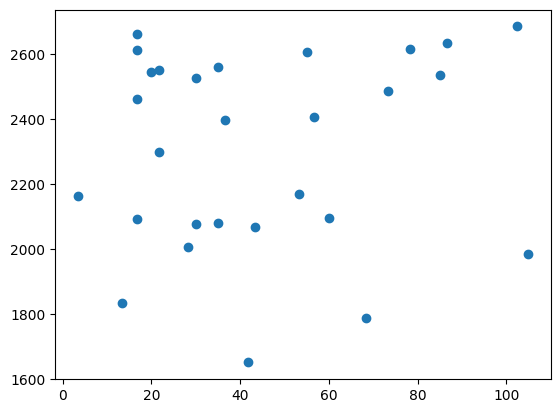

In [74]:
plt.scatter(data_mri_tonal_filtered['PTA2'], data_mri_tonal_filtered['A2009-ctx-lh-G_and_S_frontomargin_GrayVol'])
plt.show()

In [77]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})

In [81]:
data_mri

,Unnamed: 0.1,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,...,age,sex,hight,weight,DataUrodzenia,DATA_BADANIA_mri,norm_confirmed,identifier,female,male
0,0,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,...,71.7,F,168,81,1939-05-28,2011-02-07,0,Patient001,1,0
1,1,1,2119.0,2.544,0.730,2710.0,2.473,0.750,2757.0,2.285,...,34.9,M,176,85,1976-03-21,2011-02-14,0,Patient002,0,1
2,2,2,2064.0,2.361,0.581,2512.0,2.224,0.674,2927.0,2.407,...,59.4,F,158,64,1952-01-06,2011-05-02,0,Patient003,1,0
3,3,3,2424.0,2.215,0.522,2866.0,2.653,0.786,2544.0,2.121,...,63.9,F,167,77,1948-02-11,2011-12-28,0,Patient004,1,0
4,4,4,2858.0,2.614,0.604,3815.0,3.025,0.663,3752.0,2.756,...,14.2,F,162,48,1997-01-15,2011-04-11,0,Patient005,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21628,21657,21657,2073.0,2.167,0.606,3775.0,2.601,0.639,3580.0,2.416,...,18.3,M,182,105,2006-06-11,2024-09-18,0,Patient20931,0,1
21629,21658,21658,1734.0,2.080,0.533,3180.0,2.425,0.621,2528.0,2.147,...,45.4,F,167,80,1979-01-16,2024-05-14,0,Patient20932,1,0
21630,21659,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,...,30.3,F,156,51,1994-05-29,2024-09-25,0,Patient20933,1,0
21631,21660,21660,2383.0,2.408,0.622,2645.0,2.358,0.636,2141.0,2.110,...,38.6,F,170,80,1986-01-26,2024-08-06,0,Patient20934,1,0


In [80]:
data_mri['A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol'].min()

np.float64(9.0)

In [82]:
idx = data_mri['A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol'].idxmin()
print("Index wiersza z min:", idx)


Index wiersza z min: 15210


In [83]:
print(data_mri['A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol'].describe())

count    21602.000000
mean      3572.977595
std        708.296367
min          9.000000
25%       3068.000000
50%       3502.500000
75%       4024.000000
max      13455.000000
Name: A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol, dtype: float64


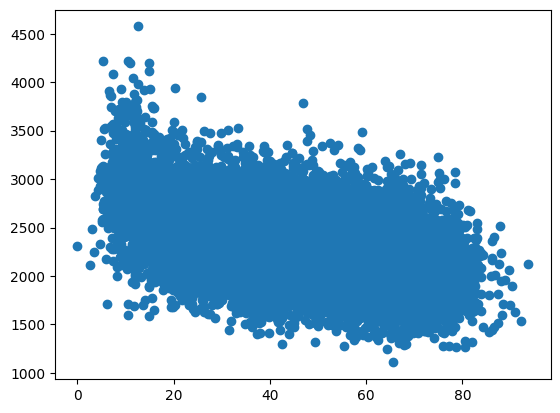

In [85]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
plt.scatter(data_mri['age'], data_mri['A2009-ctx-lh-G_and_S_frontomargin_GrayVol'])
plt.show()

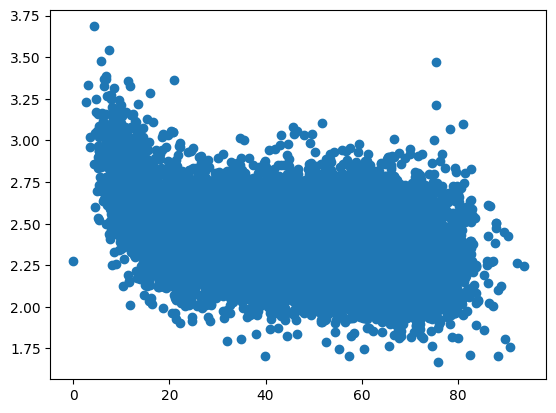

In [86]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
plt.scatter(data_mri['age'], data_mri['A2009-ctx-lh-G_and_S_frontomargin_ThickAvg'])
plt.show()

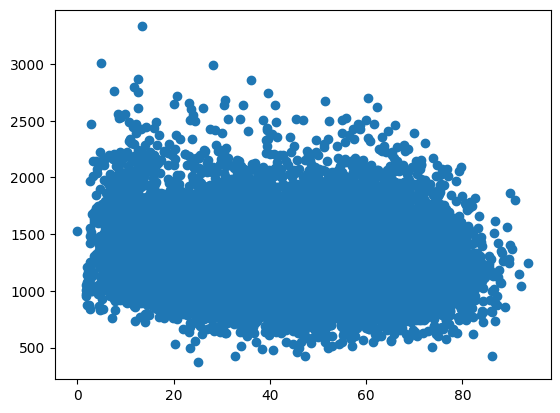

In [5]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
plt.scatter(data_mri['age'], data_mri['A2009-ctx-lh-S_pericallosal_GrayVol'])
plt.show()

In [14]:
raw_path_mri = config["datarawdirectory"] +  config["mri_dataname"] + '.csv'
raw_data_mri = pd.read_csv(raw_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
idx = raw_data_mri.index[raw_data_mri['identifier'] == 'Patient12015'].tolist()
print(idx)

[12279]


In [33]:
col='A2009-ctx-lh-S_pericallosal_GrayVol'    
mean = raw_data_mri[col].mean()
std = raw_data_mri[col].std()
difference = (raw_data_mri[col] - mean) / std
raw_data_mri['differences'] = difference

In [ ]:
raw_data_mri['differences'].max()
row_max = raw_data_mri.loc[raw_data_mri['differences'].idxmax()]
print(row_max)


Unnamed: 0                                           12279
A2009-ctx-lh-G_and_S_frontomargin_GrayVol           1114.0
A2009-ctx-lh-G_and_S_frontomargin_ThickAvg            2.85
A2009-ctx-lh-G_and_S_frontomargin_ThickStd           0.653
A2009-ctx-lh-G_and_S_occipital_inf_GrayVol          3948.0
                                                  ...     
norm_confirmed                                           0
identifier                                    Patient12015
female                                                   1
male                                                     0
differences                                      54.157218
Name: 12279, Length: 1561, dtype: object


In [38]:
idx = raw_data_mri.index[raw_data_mri['identifier'] == 'Patient12015'].tolist()

In [39]:
idx

[12279]

In [37]:
row_max[col]

np.float64(21535.0)

In [30]:
raw_data_mri[col][idx]

12279    1618.0
Name: A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol, dtype: float64

In [25]:
mean

np.float64(1280.5213351208913)

In [24]:
difference[idx]

12279    54.157218
Name: A2009-ctx-lh-S_pericallosal_GrayVol, dtype: float64

In [28]:
(raw_data_mri[col][idx] - mean)/std

12279    0.902364
Name: A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol, dtype: float64

In [31]:
(690 - mean)/std

np.float64(-1.5789590629978356)